<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/02_Neural_Networks_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

1. Docstring Shortcut - Shift + Cmd + Space

## Input Shape for Images Classification

1. Batch Size (32 is very common batch size)
2. Width
3. Height
4. Color Channels

## Activation function

1. For binary classification - Sigmoid
2. For multiclass classfication - SoftMax
3. Usually in dense layers - ReLU

## Loss Function

1. Binary CrossEntropy
2. Multiclass CrossEntropy

## Create Data for Binary classification 1/0

In [2]:
## Create 1000 examples
n_samples = 1000


# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [12]:
circles = pd.DataFrame({"X0": X[:, 0], "X1":X[:, 1], "label": y })
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


from matplotlib import pyplot as plt
circles['X0'].plot(kind='hist', bins=20, title='X0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
circles['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
circles['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
circles.plot(kind='scatter', x='X0', y='X1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
circles.plot(kind='scatter', x='X1', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
circles['X0'].plot(kind='line', figsize=(8, 4), title='X0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
circles['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
circles['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

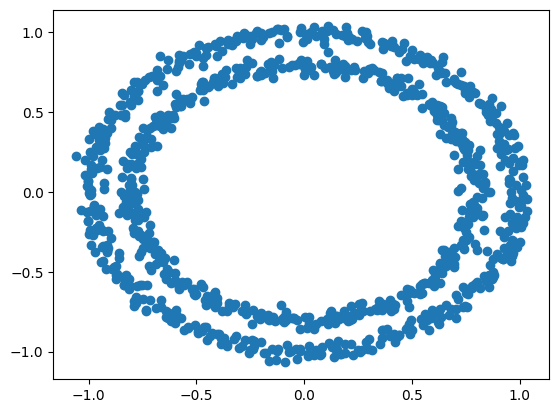

In [13]:
plt.scatter(X[:, 0], X[:, 1])

## Input and Output Shapes

In [16]:
X.shape, y.shape

((1000, 2), (1000,))

In [19]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Model 1



In [36]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.SGD(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.8388 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.0027 - accuracy: 0.4980
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7471 - accuracy: 0.4980
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7093 - accuracy: 0.4940
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4960
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5190
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5050
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4740
Epoch 11/

In [37]:
circle_classification_model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

## Model 2

Trying to make model a bit more complex by adding extra hidden layer since it's accuracy is only 50%

In [41]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.SGD(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_2.fit(X, y, epochs=100, verbose=0)

In [39]:
circle_classification_model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933248043060303, 0.5]

## Model 3 - Improvement

Common ways to improve the model

1. Adding more hidden layers
2. Increase the number of hidden units
3. Change the activation function
4. Change the optimzation function
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer

In [42]:
tf.random.set_seed(42)


# Create a Model
circle_classification_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
circle_classification_model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                    optimizer=tf.keras.optimizers.Adam(),
                                    metrics="accuracy")

# Fit the model
circle_classification_model_3.fit(X, y, epochs=100, verbose=0)

In [43]:
circle_classification_model_3.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5040


[0.6933885812759399, 0.5040000081062317]

### Accuracy is still the same even with 2 hidden units and more neurons added with Adam optimizer. Model isn't learning at all. What's happening? ###